In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from psychopy import visual, core

## Collect response times

In [35]:
from psychopy import event
win = visual.Window([600,600],pos=[0,0])
f = open('wordpool.txt','r')
words = f.readlines()
responses = []
rts = []
word_pres_dur = 2
#nwords = 5

for ival in words:
    stim = visual.TextStim(win,text=ival.rstrip('\n'))
    #stim.pos = [0,0]
    stim.draw() # vs .autoDraw=True
    win.flip()
    prestime = core.getTime()
    pressedinfo = event.waitKeys(keyList=['j','k','q'],
                                    timeStamped=True)
    #core.wait(1)
    responses.append(pressedinfo[0][0])
    rts.append(pressedinfo[0][1]-prestime)
    
    if pressedinfo[0][0] == 'q':
        break

win.close()
responses

3158.0093 	WARNING 	Monitor specification not found. Creating a temporary one...


['j', 'k', 'k', 'j', 'q']

In [36]:
pressedinfo

[['q', 3166.08989831293]]

In [34]:
win.close()

3086.4678 	WARNING 	Monitor specification not found. Creating a temporary one...


In [37]:
print(responses)
print(rts)

['j', 'k', 'k', 'j', 'q']
[2.7481315040495247, 2.1288813279243186, 0.6753999770153314, 0.6104216339299455, 1.032028960995376]


## Visualize recall times

In [4]:
data = pd.read_csv('lecture15_catfr_retrieval_data.txt')

In [5]:
data.head()

,subj,task,session,list,word,category,intrusion,rectime
0,R1004D,catFR1,0,1,SPARROW,Birds,0,6.789
1,R1004D,catFR1,0,2,GIRAFFE,Zoo,0,7.062
2,R1004D,catFR1,0,2,BEAR,Zoo,0,17.654
3,R1004D,catFR1,0,6,CHEESECAKE,Desserts,0,4.894
4,R1004D,catFR1,0,6,CAKE,Desserts,0,6.017


In [8]:
subj_list = data.list[data.subj=='R1004D']
subj_intrusion = data.intrusion[data.subj=='R1004D']
subj_rectime = data.rectime[data.subj=='R1004D']

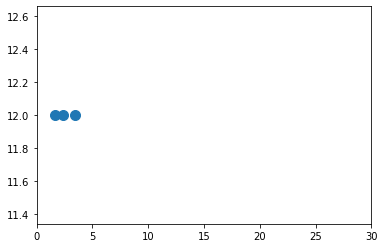

In [31]:
list_num = 12
currlist = (subj_list == list_num)
currrecs = subj_rectime[currlist]
#plt.scatter
x = subj_rectime[currlist]
y = subj_list[currlist]
plt.plot(x,y,'.',markersize=20)
plt.xlim([0,30])
plt.show()

In [25]:
x


8     1.645
9     2.346
10    3.432
Name: rectime, dtype: float64